In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

/home/tacit/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# %pip install librosa

In [30]:
#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

audio_fpath = "Androids-Corpus/Reading-Task/audio/HC/"
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

No. of .wav files in audio folder =  54


In [ ]:
os.listdir("Androids-Corpus/Reading-Task/audio")

"""

target directory "Androids-Corpus/Reading-Task/audio" the files are in 'HC' and'PT' subdirs there

"""

['HC', 'PT', '.DS_Store']

- nn_XGmm_t.wav,
- nn is a unique integer identifier suchthat, in a given group, files with the same nn contain the voiceof the same speaker (there is a trailing 0 for numbers lower than 10),
- X is an alphabetic character corresponding to the speaker’s
condition (P for depression patient and C for control),
- G is analphabetic character that stands for the speaker’s gender (M for male and F for female),
- mm is a two-digits integer number corresponding to the speaker’s age,
- t is an integer number between 1 and 4accounting for the education level (1 corresponds to primary school and 4 corresponds to university).
- The letter Xwas used for the 2 participants who did not provide informationabout this aspect.
- There is no indication of the task because recordings corresponding to RT and IT are stored in different
directories.

In [38]:
import re
import pandas as pd

In [45]:
matchs.groups()

('14', 'C', 'F', '49', '3')

In [10]:
# %pip install opensmile

### Mel-specs & 

In [31]:
x, sr = librosa.load(audio_fpath+audio_clips[4], sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(2096981,) 44100


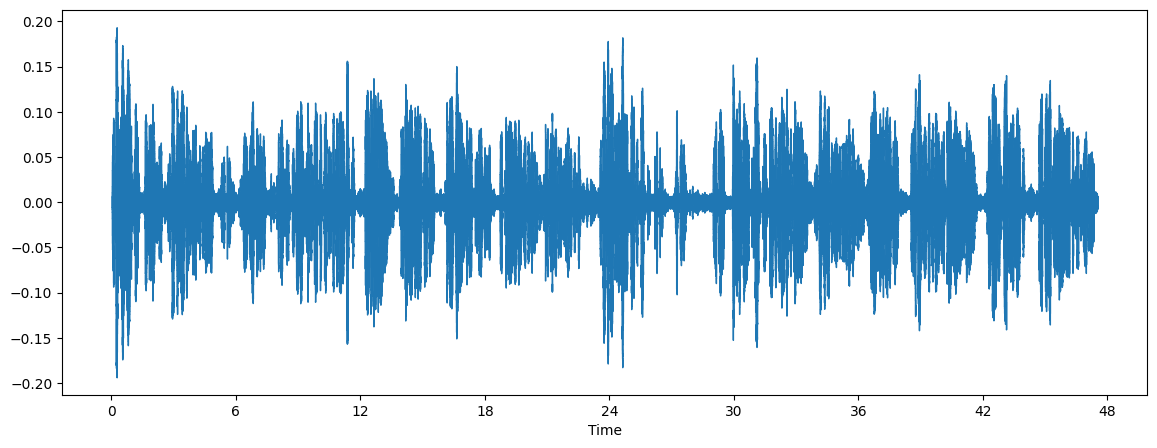

In [32]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

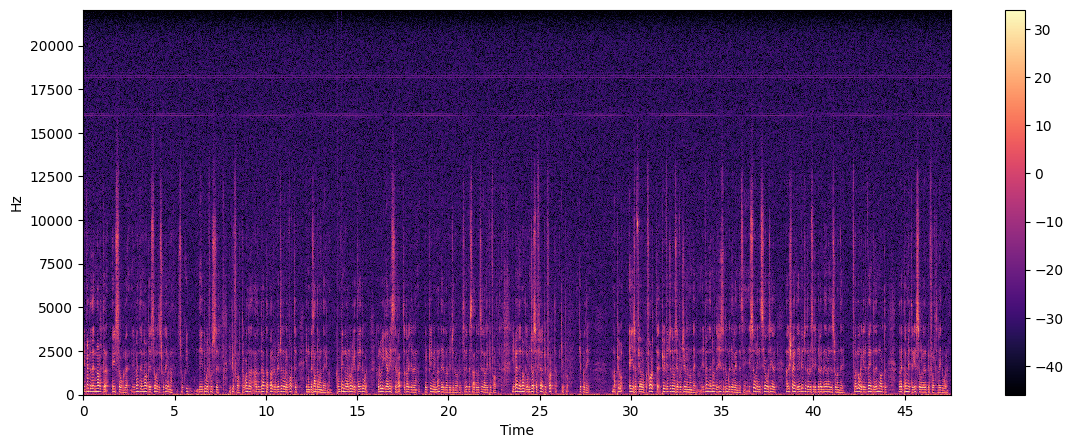

In [33]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [34]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)


signaltonoise(x)

array(-0.00035442, dtype=float32)

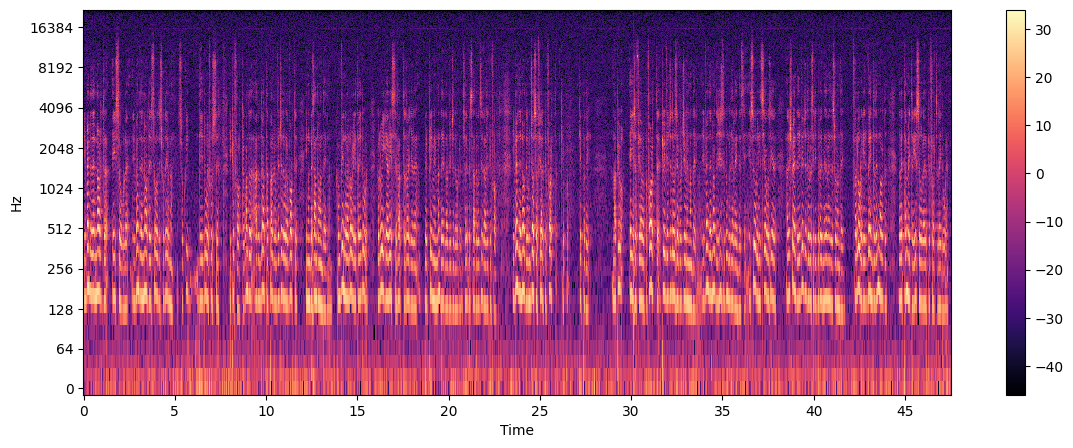

In [35]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
###

## Task n°4. 

Do a table describing the distribution of patients and healthy controls. The label (‘control’ or‘patient’) is included in the name of the files: ID {P,C}{M,F}{Age}{Edu. Level}.wav


In [48]:
# Path to corpus
base_dir = "Androids-Corpus/Reading-Task/audio"
subdirs = ["HC", "PT"]

data = []

# Regex for filename parsing: ID_P{gender}{age}_{edu}.wav
pattern = re.compile(r"(\d+)_([PC])([MF])(\d+)_([A-Za-z0-9]+)\.wav")


for subdir in subdirs:
    folder = os.path.join(base_dir, subdir)
    for fname in os.listdir(folder):
        matchs = pattern.match(fname)
        if matchs:
            id, label, gender, age, edu = matchs.groups()
            label = "Patient" if label == "P" else "Control"
            data.append({
                "File": fname,
                "Group": label,
                "Gender": "Male" if gender == "M" else "Female",
                "Age": int(age),
                "Education": edu
            })

df = pd.DataFrame(data)

# Summary table
summary = df.groupby(["Group", "Gender"]).agg(
    Count=("File", "count"),
    Mean_Age=("Age", "mean"),
    Min_Age=("Age", "min"),
    Max_Age=("Age", "max")
).reset_index()

print(summary)

# # Show raw counts by education level too
# edu_summary = df.groupby(["Group", "Education"]).size().reset_index(name="Count")

# import caas_jupyter_tools
# caas_jupyter_tools.display_dataframe_to_user("Summary distribution of patients and controls", summary)
# caas_jupyter_tools.display_dataframe_to_user("Distribution by education level", edu_summary)

     Group  Gender  Count   Mean_Age  Min_Age  Max_Age
0  Control  Female     42  47.547619       22       69
1  Control    Male     12  45.416667       23       71
2  Patient  Female     38  45.684211       26       68
3  Patient    Male     20  50.550000       19       68


In [49]:
# Path to corpus
base_dir = "Androids-Corpus/Interview-Task/audio"
subdirs = ["HC", "PT"]

data = []

# Regex for filename parsing: ID_P{gender}{age}_{edu}.wav
pattern = re.compile(r"(\d+)_([PC])([MF])(\d+)_([A-Za-z0-9]+)\.wav")


for subdir in subdirs:
    folder = os.path.join(base_dir, subdir)
    for fname in os.listdir(folder):
        matchs = pattern.match(fname)
        if matchs:
            id, label, gender, age, edu = matchs.groups()
            label = "Patient" if label == "P" else "Control"
            data.append({
                "File": fname,
                "Group": label,
                "Gender": "Male" if gender == "M" else "Female",
                "Age": int(age),
                "Education": edu
            })

df_i = pd.DataFrame(data)

# Summary table
summary_i = df_i.groupby(["Group", "Gender"]).agg(
    Count=("File", "count"),
    Mean_Age=("Age", "mean"),
    Min_Age=("Age", "min"),
    Max_Age=("Age", "max")
).reset_index()

print(summary_i)

# # Show raw counts by education level too
# edu_summary = df.groupby(["Group", "Education"]).size().reset_index(name="Count")

# import caas_jupyter_tools
# caas_jupyter_tools.display_dataframe_to_user("Summary distribution of patients and controls", summary)
# caas_jupyter_tools.display_dataframe_to_user("Distribution by education level", edu_summary)

     Group  Gender  Count   Mean_Age  Min_Age  Max_Age
0  Control  Female     41  47.414634       22       69
1  Control    Male     11  46.909091       23       71
2  Patient  Female     43  46.116279       26       68
3  Patient    Male     21  50.190476       19       68


In [ ]:
##

In [53]:
%pip install --force-reinstall --no-cache-dir numpy==1.26.2
import numpy as np
print(np.__version__)


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 35.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
faststylometry 1.0.4 requires numpy<=1.24.3,>=1.18, but you have numpy 1.26.2 which is incompatible.
faststylometry 1.0.4 requires pandas<=2.1.0,>=1.5.3, but you have pandas 2.2.3 which is incompatible.
opensesame-core 4.0.32 requires numpy<1.25, but you have numpy 1.26.2 which is incompatible.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
2.1.3


## 2

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

In [ ]:
r_features_fparth = "original_features/reading"
i_features_fparth = "original_features/reading"

subdirs = ["HC", "PT"]

 several samples per speaker in the interview task. i.e. original_features/spont the subdirs correspond to individual speakers, not groups and contain multiple files inside per speaker)
 [text](scaled_features/spont/01_CF56_1/01_CF56_1_1.csv) [text](scaled_features/spont/01_CF56_1/01_CF56_1_2.csv) [text](scaled_features/spont/01_CF56_1/01_CF56_1_3.csv) [text](scaled_features/spont/01_CF56_1/01_CF56_1_4.csv) [text](scaled_features/spont/01_CF56_1/01_CF56_1_5.csv) [text](scaled_features/spont/01_CF56_1/01_CF56_1_6.csv) [text](scaled_features/spont/01_CF56_1/01_CF56_1_7.csv) [text](scaled_features/spont/01_CF56_1/01_CF56_1_8.csv) [text](scaled_features/spont/01_CF56_1/01_CF56_1_9.csv) [text](scaled_features/spont/01_CF56_1/01_CF56_1_10.csv)

 For the Interview task, how can we obtain one feature file per recording?

In [8]:
!python batch_proc_fs.py

In [4]:


# column lists
rms_col = ["pcm_RMSenergy_sma"]
mfcc_cols = [f"pcm_fftMag_mfcc_sma[{i}]" for i in range(1,13)]
f0_col = ["F0final_sma"]
zcr_col = ["pcm_zcr_sma"]
voicing_col = ["voicingFinalUnclipped_sma"]

eps = 1e-8

# transformers
log_transformer = FunctionTransformer(lambda X: np.log(X + eps), validate=False)
log_f0_transformer = FunctionTransformer(lambda X: np.log(X + eps), validate=False)  # or convert to semitone

rms_pipeline = Pipeline([
    ("log", log_transformer),
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])

mfcc_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])

f0_pipeline = Pipeline([
    ("mask_impute", SimpleImputer(strategy="median")),  # make sure F0 unvoiced are NaN in df
    ("log", log_f0_transformer),
    ("scale", StandardScaler())
])

zcr_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])

voicing_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="constant", fill_value=0.0)),  # if missing
    ("scale", StandardScaler())
])

preprocessor = ColumnTransformer([
    ("rms", rms_pipeline, rms_col),
    ("mfcc", mfcc_pipeline, mfcc_cols),
    ("f0", f0_pipeline, f0_col),
    ("zcr", zcr_pipeline, zcr_col),
    ("voicing", voicing_pipeline, voicing_col),
], remainder="drop")


### 3

### 4

sections 2 3 4
wtf are egemaps features

In [9]:
import os
import random
import opensmile
import soundfile as sf
import pandas as pd

In [10]:
# Path to directory with audio files
audio_fpath = "Androids-Corpus/Reading-Task/audio/HC/"

# Pick a random audio file
files = [f for f in os.listdir(audio_fpath) if f.endswith(".wav")]
rand_file = random.choice(files)
audio_file = os.path.join(audio_fpath, rand_file)
print(f"🎧 Selected file: {audio_file}")

# Load audio
signal, sr = sf.read(audio_file)

# Define openSMILE extractors
smile_egemaps = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)

smile_compare = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
)

# Extract features
features_egemaps = smile_egemaps.process_signal(signal, sr)
features_compare = smile_compare.process_signal(signal, sr)

# Merge both feature sets
features = pd.concat([features_egemaps, features_compare], axis=1)

# Save to CSV
out_csv = f"{os.path.splitext(rand_file)[0]}_functionals.csv"
features.to_csv(out_csv)
print(f"✅ Saved features to {out_csv}")

🎧 Selected file: Androids-Corpus/Reading-Task/audio/HC/17_CF55_3.wav
✅ Saved features to 17_CF55_3_functionals.csv


In [ ]:


# Path to directory with audio files
audio_fpath = "Androids-Corpus/Reading-Task/audio/HC/"

# Pick a random audio file
files = [f for f in os.listdir(audio_fpath) if f.endswith(".wav")]
rand_file = random.choice(files)
audio_file = os.path.join(audio_fpath, rand_file)
print(f"🎧 Selected file: {audio_file}")

# Load audio
signal, sr = sf.read(audio_file)

# Define openSMILE extractors
smile_egemaps = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)

smile_compare = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
)

# Extract features
features_egemaps = smile_egemaps.process_signal(signal, sr)
features_compare = smile_compare.process_signal(signal, sr)

# Merge both feature sets
features = pd.concat([features_egemaps, features_compare], axis=1)

# Save to CSV
out_csv = f"{os.path.splitext(rand_file)[0]}_functionals.csv"
features.to_csv(out_csv)
print(f"✅ Saved features to {out_csv}")


In [ ]:
#

## downloads...

In [4]:
%pip list

Package                            Version
---------------------------------- ------------------
absl-py                            2.1.0
aiofiles                           24.1.0
aiohappyeyeballs                   2.6.1
aiohttp                            3.11.16
aiosignal                          1.3.2
annotated-types                    0.7.0
anyio                              4.9.0
appdirs                            1.4.4
arxiv                              2.1.3
asttokens                          3.0.0
astunparse                         1.6.3
async-timeout                      4.0.3
attrs                              24.3.0
Automat                            24.8.1
autopep8                           1.6.0
Babel                              2.8.0
backcall                           0.2.0
backoff                            2.2.1
bcrypt                             3.2.0
beautifulsoup4                     4.12.3
beniget                            0.4.1
blinker                            1